In [1]:
from datetime import datetime

from lxml import html
import requests

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from pandas.tools.plotting import scatter_matrix
from matplotlib.finance import candlestick_ohlc


pd.options.display.max_columns = 50

In [14]:
from itertools import cycle
import random
import sys

import pygame
from pygame.locals import *

ModuleNotFoundError: No module named 'pygame'

In [2]:
# fetch page and build html tree

def print_Element(element):
    print ("<%s %s>%s ..." %(element.tag, element.attrib, element.text_content()[:200].replace("\n", " ")))

In [3]:
page = requests.get('https://en.wikipedia.org/wiki/Parliament_of_Uganda')
tree = html.fromstring(page.text)
print_Element(tree)

<html {'class': 'client-nojs', 'lang': 'en', 'dir': 'ltr'}>   Parliament of Uganda - Wikipedia document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" ); (window.RLQ=window.RLQ||[]).push(func ...


In [4]:
#Locating the tables

tables = tree.xpath('//table[@class="wikitable"]')
for table in tables:
    print_Element(table)

<table {'class': 'wikitable', 'style': 'text-align:right; font-size: 95%;'}> e • d Summary of the 23 February 2006 National Assembly of Uganda election results  Parties Votes % Constituency seats District woman reps. Indirect seats Total seats   National Resistance Movement   ...
<table {'class': 'wikitable', 'style': 'text-align:right; font-size: 95%;'}> e • d Summary of the 18 February 2011 National Assembly of Uganda election results  Parties Constituency seats District woman reps. Indirect seats Total seats   National Resistance Movement 164 86 13 ...
<table {'class': 'wikitable', 'style': 'text-align:right'}>  Party Votes % Seats   Direct Women Special Total +/–   National Resistance Movement   199 84 10 293 +30   Forum for Democratic Change   29 7 0 36 +2   Democratic Party   13 2 0 15 +3   Uganda People ...


In [5]:
# when locating table watchout for the client side javascript alteration to the HTML Code

table = tree.xpath('//table[@class="wikitable"]')[0]
print_Element(table)

<table {'class': 'wikitable', 'style': 'text-align:right; font-size: 95%;'}> e • d Summary of the 23 February 2006 National Assembly of Uganda election results  Parties Votes % Constituency seats District woman reps. Indirect seats Total seats   National Resistance Movement   ...


In [6]:
#Extract the partiess 

subjects = [[subject[index].text_content() for index in range(5)] for subject in table.xpath('tr')[1:-5]]
subjects = pd.DataFrame(subjects, columns=["name", "constituency_seats", "District_woman_reps",
                                          "indirect_seats", "total_seats"])
subjects

,name,constituency_seats,District_woman_reps,indirect_seats,total_seats
0,National Resistance Movement,,,142,49
1,Forum for Democratic Change,,,27,10
2,Uganda People's Congress,,,9,-
3,Democratic Party,,,8,-
4,Conservative Party,,,1,-
5,Justice Forum,,,1,-
6,Independents,,,26,10
7,Vacant,,,1,-


In [7]:
df = pd.read_csv('uganda.csv')
df


,name,constituency_seats,District_woman_reps,indirect_seats,total_seats
0,National Resistance Movement,164,86,13,263.0
1,Forum for Democratic Change,23,11,—,34.0
2,Democratic Party,11,1,—,12.0
3,Uganda People's Congress,7,3,—,10.0
4,Conservative Party,1,—,—,1.0
5,Justice Forum,1,—,—,1.0
6,Independents,30,11,2,43.0
7,Uganda People's Defence Force Representatives,,10,10,NaN
8,Vacant,1,,1,NaN
9,Total (turnout %),238,112,25,375.0


In [10]:
axes?

In [11]:
fig = plt.figure(figsize=(10,6))
axes = fig.add_subplot(111)

candlestick_ohlc(axes, df[["name", "total_seats", "constituency_seats", "District_woman_reps"]].values,
            width=0.6, colorup='g', colordown='r')

axes.xaxis_date()
plt.gcf().autofmt_xdate()

plt.grid()
plt.show();

KeyError: "['name' 'constituency_seats' 'District_woman_reps'] not in index"

/home/jethro/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Web Scraping'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


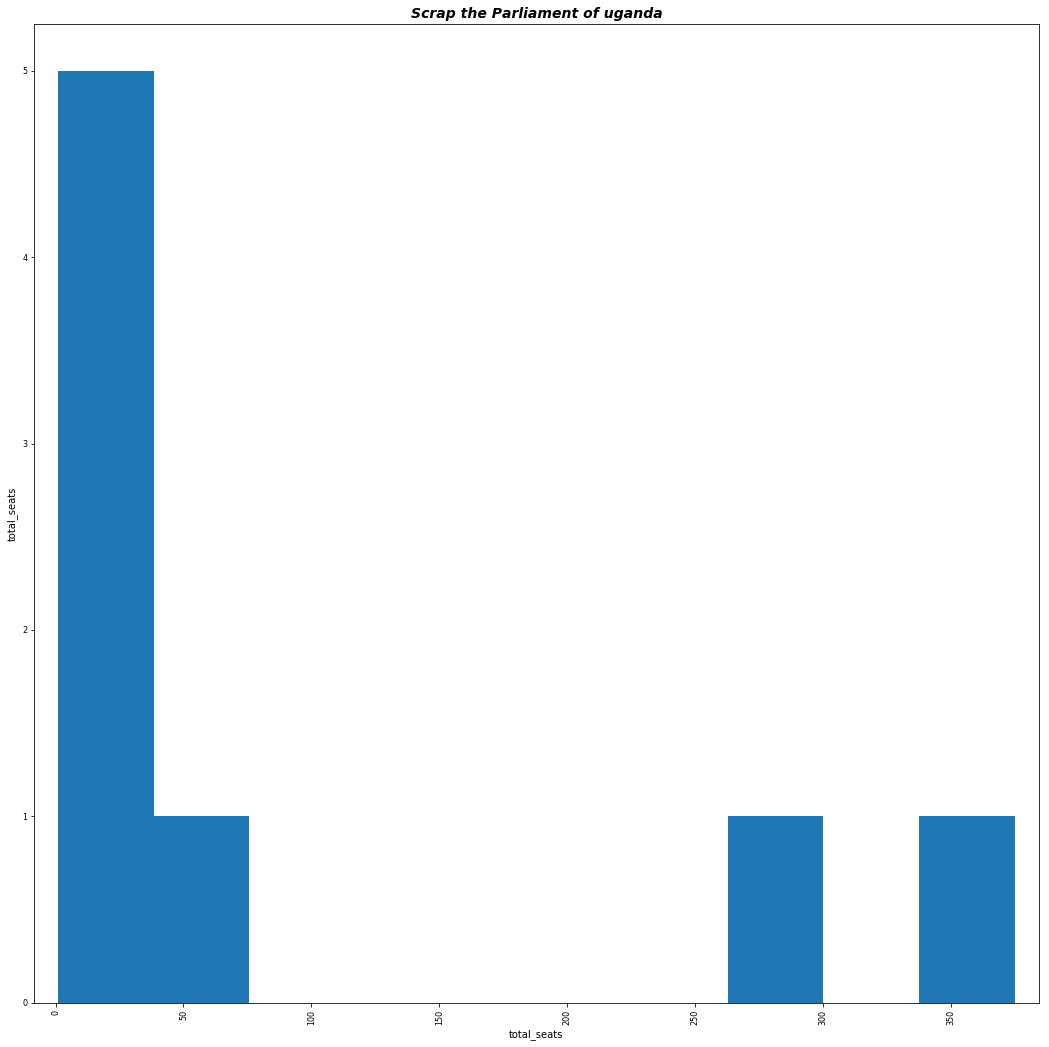

In [48]:
# comparing the previous total seats and the current seats elected
from pandas.plotting import scatter_matrix

scatter_matrix(df, alpha=0.05, c="g", marker=r'$\clubsuit$',
            label="Luck", figsize=(18, 18))

plt.title("Scrap the Parliament of uganda", fontname='Web Scraping', fontsize=14,
            fontstyle='italic', fontweight='bold',
            )
pass
plt.show()


/home/jethro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


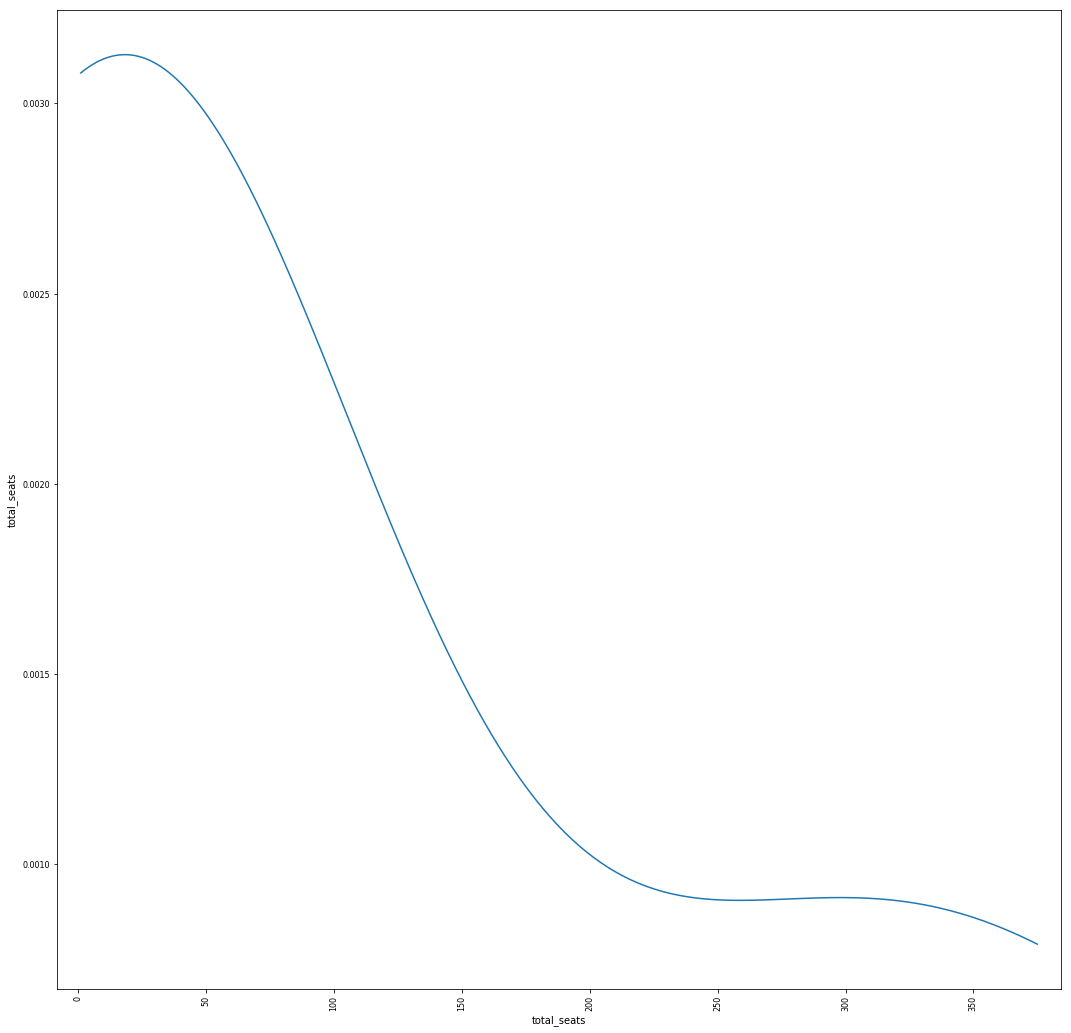

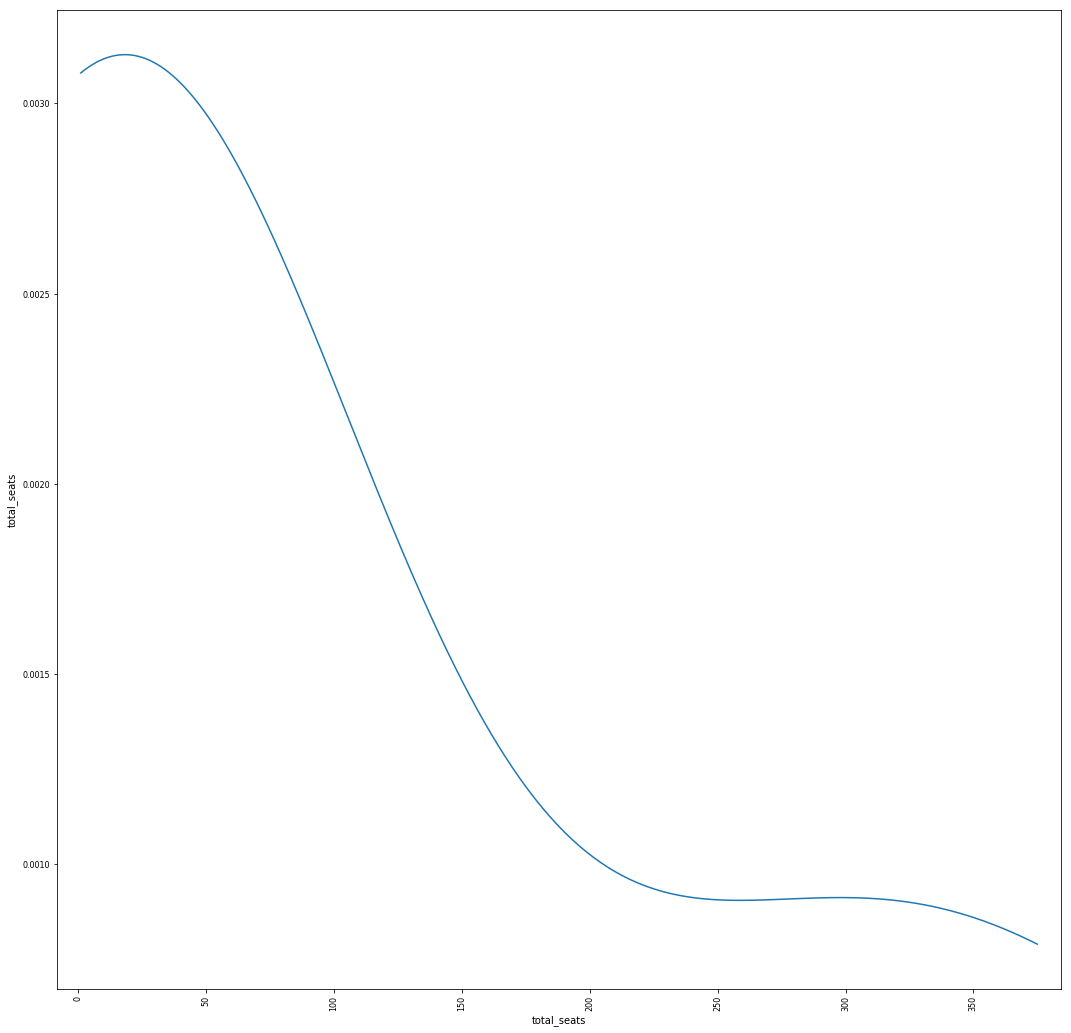

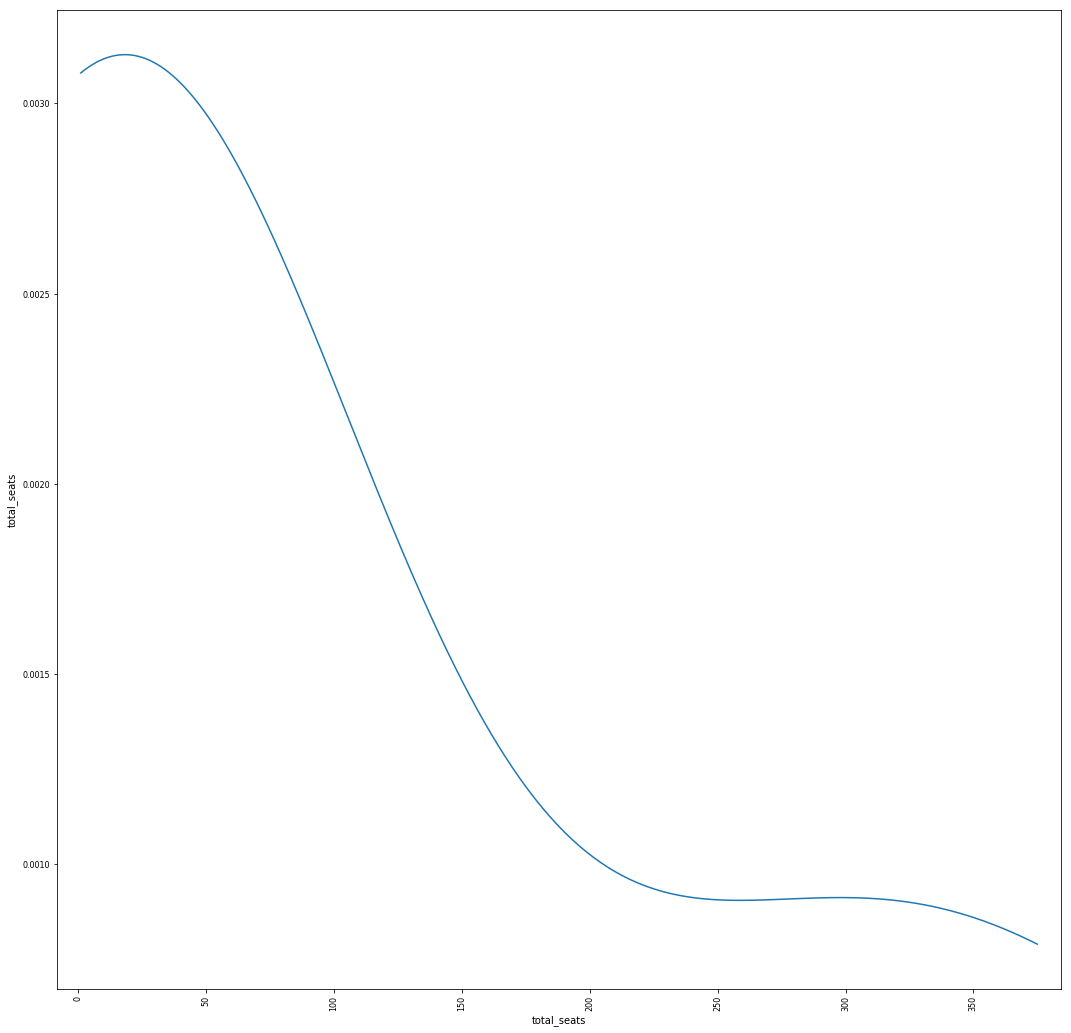

In [33]:

from pandas.tools.plotting import scatter_matrix
scatter_matrix(df, alpha=0.05, figsize=(18, 18), diagonal='kde')
pass
plt.show()



In [15]:
# do the predictions using the classifying model as my choice okay.
total_seats= df.iloc[:, :4].values
total_seats = df['total_seats'].values
np.unique(total_seats)


array([   1.,   10.,   12.,   34.,   43.,  263.,  375.,   nan,   nan])

In [17]:
#Class label encoding
from sklearn.preprocessing import LabelEncoder

l_encoder = LabelEncoder()
l_encoder.fit(total_seats)
l_encoder.classes_

array([   1.,   10.,   12.,   34.,   43.,  263.,  375.,   nan,   nan])

In [ ]:
# let me try to replace this null values with something
y_enc = l_encoder.transform(total_seats)
np.unique(y_enc)